In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from time import time
from mpl_toolkits.mplot3d import Axes3D
import math
import os
from matplotlib import cm


In [2]:
from classes.cartesian.Mesh import Mesh
from classes.NeuralNet import PINN_NeuralNet
from classes.cartesian.PINN import PINN
from classes.cartesian.PDE_Model import PDE_Model
from classes.cartesian.Preconditioner import preconditioner

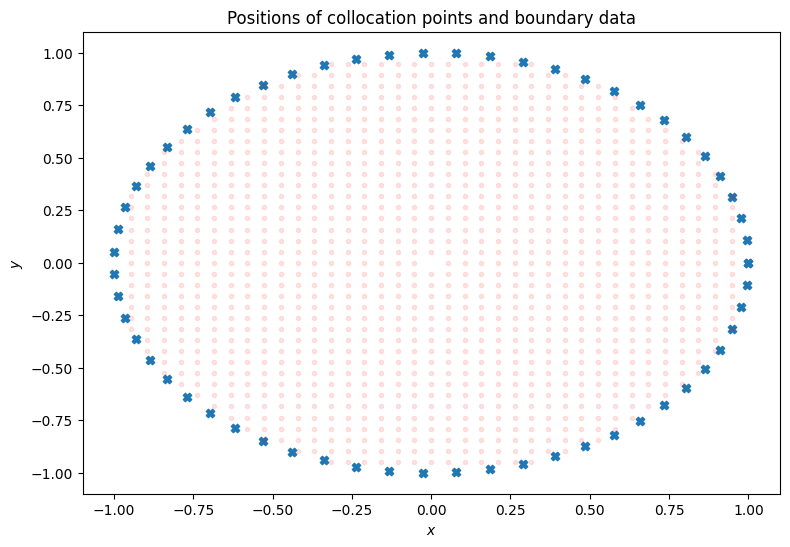

In [3]:
precond = preconditioner()

domain = ([-1,1],[-1,1])

domain = precond.set_domain(domain)

lb = {'type':'D', 'value':0, 'fun':None, 'dr':None, 'r':1}
borders = {'1':lb}
ins_domain = {'rmax': 1}

mesh = Mesh(domain, N_b=60, N_r=1500)
mesh.create_mesh(borders, ins_domain)
mesh.plot_points();

PINN_precond = PINN()

PINN_precond.adapt_mesh(mesh)

lr = ([1000,3000],[1e-2,5e-3,5e-4])
hyperparameters = {
        'input_shape_N': (None,2),
        'num_hidden_layers': 8,
        'num_neurons_per_layer': 20,
        'output_dim': 1,
        'activation': 'tanh'
}

PINN_precond.create_NeuralNet(PINN_NeuralNet,lr=lr,**hyperparameters)

PINN_precond.load_preconditioner(precond)


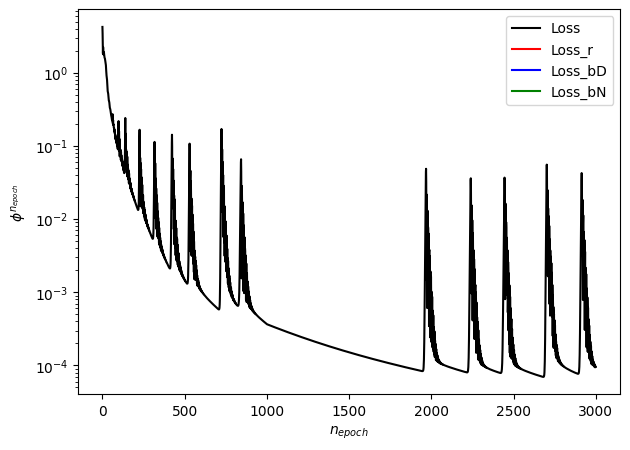

In [4]:
PINN_precond.preconditionate(N=3000,flag_time=False)
PINN_precond.plot_loss_history();

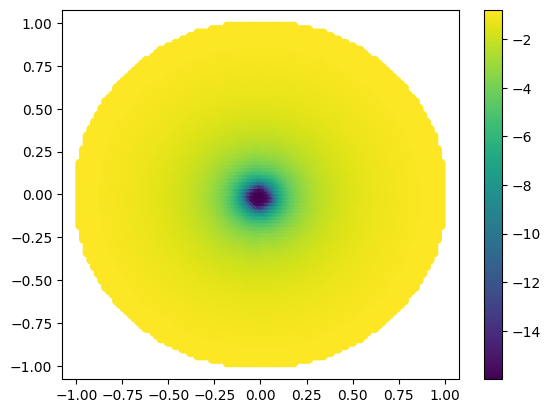

In [5]:
x,y,u = PINN_precond.get_u()

plt.scatter(x,y,c=u)
plt.colorbar();

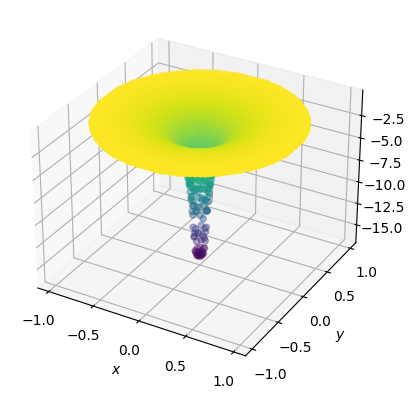

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,y,u, c=u)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [8]:
PINN_precond.save_model('.saved_models','test_precond')

INFO:tensorflow:Assets written to: c:\Users\achom\Desktop\Todo\Code\PINNS\Code\.saved_models\test_precond\assets


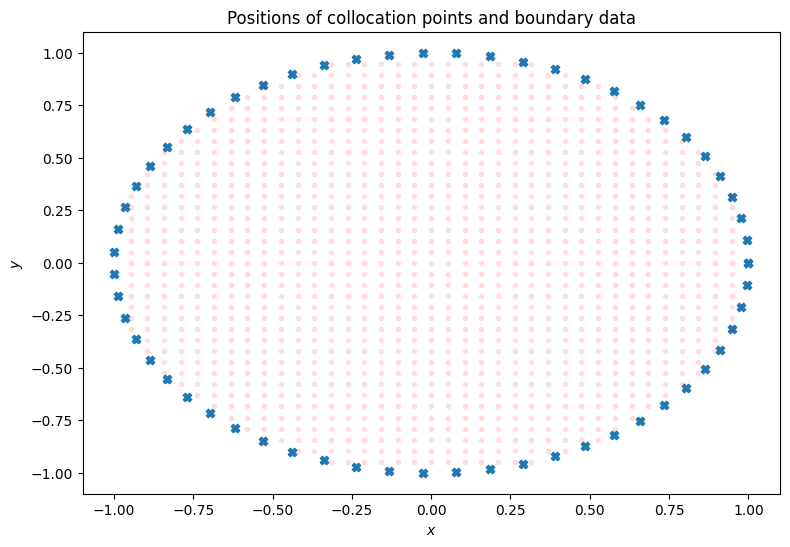

In [8]:
domain = ([-1,1],[-1,1])

PDE = PDE_Model()
domain = PDE.set_domain(domain)

lb = {'type':'D', 'value':-2, 'fun':None, 'dr':None, 'r':1}
borders = {'1':lb}
ins_domain = {'rmax': 1,'rmin':-1}

mesh = Mesh(domain, N_b=60, N_r=1500)
mesh.create_mesh(borders, ins_domain)
mesh.plot_points();

PINN_solver = PINN()

PINN_solver.adapt_PDE(PDE)

weights = {
        'w_r': 1,
        'w_d': 1,
        'w_n': 1
}
PINN_solver.adapt_mesh(mesh,**weights)

lr = ([1500,2200],[7e-3,1e-3,5e-4])
hyperparameters = {
        'input_shape_N': (None,2),
        'num_hidden_layers': 8,
        'num_neurons_per_layer': 20,
        'output_dim': 1,
        'activation': 'tanh'
}

PINN_solver.load_NeuralNet('.saved_models/','test_precond',lr=lr)


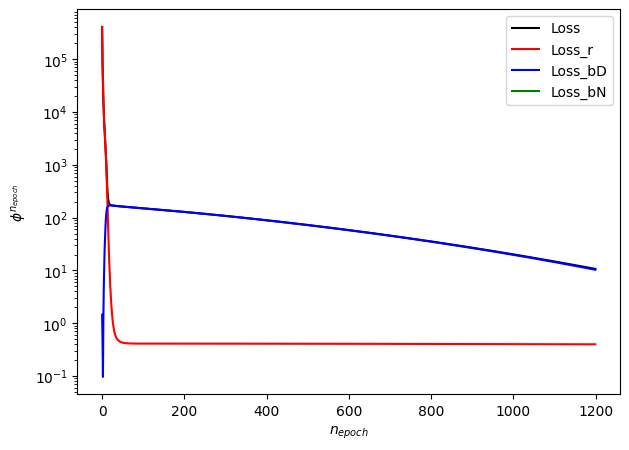

In [9]:
PINN_solver.solve(N=1200,flag_time=False)
PINN_solver.plot_loss_history();

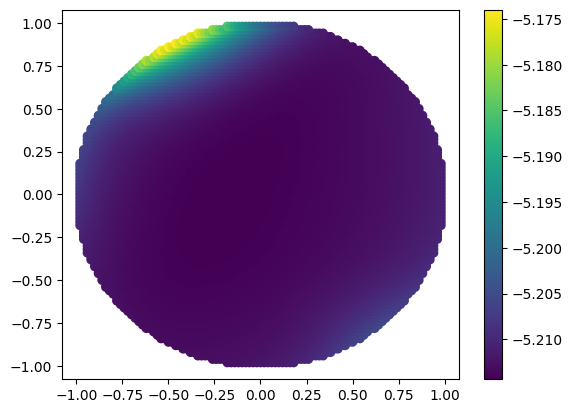

In [12]:
x,y,u = PINN_solver.get_u()

plt.scatter(x,y,c=u)
plt.colorbar();

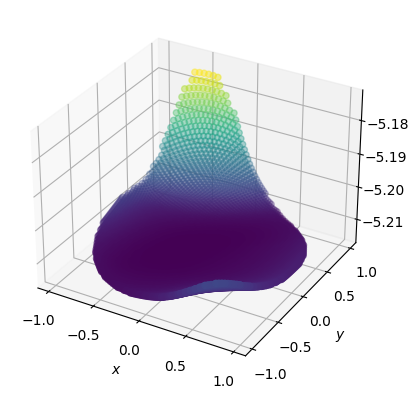

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,y,u, c=u)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');